Exploring ARIMA models from a [tutorial.](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

In [10]:
# import useful libraries
# Load useful packages
import seaborn as sns
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
print(alt.renderers.active)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from scipy import sparse
import io
import altair as alt
from pandas.tools.plotting import autocorrelation_plot


notebook


In [22]:
# load the dataset
# dtype = {
#                     'class_label' : 'category', # 0 = background; 1 = signal
#                     'lepton 1 pT' : 'float', 
#                     'lepton 1 eta': 'float', 
#                     'lepton 1 phi': 'float', 
#                     'lepton 2 pT' : 'float', 
#                     'lepton 2 eta': 'float', 
#                     'lepton 2 phi': 'float', 
#                     'missing energy magnitude': 'float', 
#                     'missing energy phi'      : 'float', 
#                     'MET_rel'     : 'float', 
#                     'axial MET'   : 'float', 
#                     'M_R'         : 'float', 
#                     'M_TR_2'      : 'float', 
#                     'R'           : 'float', 
#                     'MT2'         : 'float', 
#                     'S_R'         : 'float', 
#                     'M_Delta_R'   : 'float', 
#                     'dPhi_r_b'    : 'float', 
#                     'cos(theta_r1)': 'float', 
# }
dateparse = lambda dates: [pd.datetime.strptime('190'+d, '%Y-%m') for d in dates]

#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv',parse_dates=['Month'], date_parser=dateparse)
df.columns = ['month','sales']
df.dtypes

month    datetime64[ns]
sales           float64
dtype: object

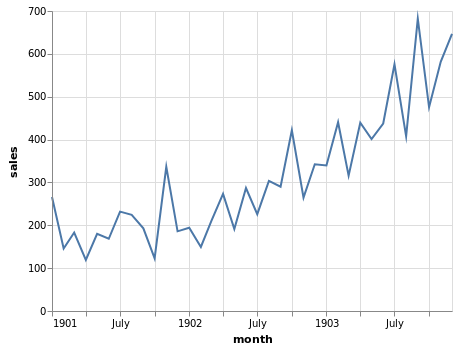

In [28]:
alt.Chart(df).mark_line().encode(
    x='month:T',
    y='sales:Q'
)

### Have data now do an ARIMA model


In [51]:

#from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(df)
#plt.show()

In [52]:
### I give up - not sure why my date parser is not playing well with matplotlib, so go over to their's:

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


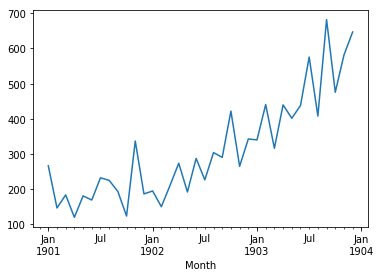

In [65]:
from pandas import read_csv
from pandas import datetime
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.columns=['Month','Sales']
series.name = '3yr Sales'
series.plot()
plt.show()

In [66]:
series.name


'3yr Sales'

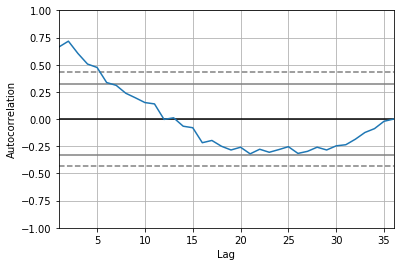

In [67]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimen

                             ARIMA Model Results                              
Dep. Variable:            D.3yr Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 13 Feb 2019   AIC                            406.340
Time:                        17:21:07   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.3yr Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.3yr Sales    -0.

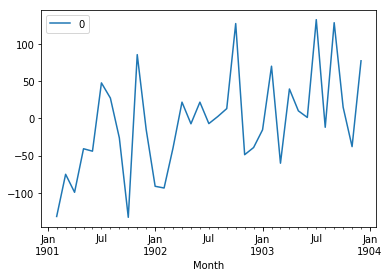

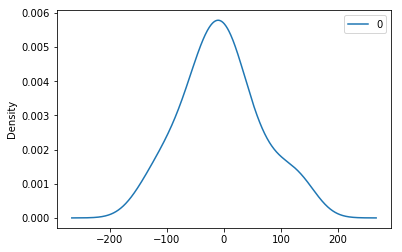

                0
count   35.000000
mean    -5.495218
std     68.132882
min   -133.296637
25%    -42.477890
50%     -7.186512
75%     24.748330
max    133.237936


In [72]:
from statsmodels.tsa.arima_model import ARIMA
def do_model(series,order=(5,1,0)):
    model = ARIMA(series, order=order)
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    # plot residual errors
    residuals = DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())
    
do_model(series)

#### Maybe try a hyperparameter search?

/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimen

                             ARIMA Model Results                              
Dep. Variable:           D2.3yr Sales   No. Observations:                   34
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -200.455
Method:                       css-mle   S.D. of innovations             84.912
Date:                Wed, 13 Feb 2019   AIC                            410.911
Time:                        17:24:20   BIC                            418.543
Sample:                    03-01-1901   HQIC                           413.514
                         - 12-01-1903                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7493      3.839      0.456      0.652      -5.775       9.273
ar.L1.D2.3yr Sales    -1.5142      0.162     -9.360      0.000      -1.831      -1.197
ar.L2.D2.3yr Sales  

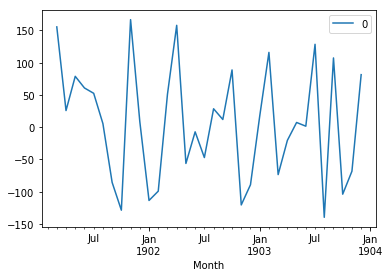

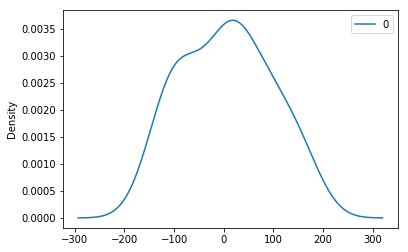

                0
count   34.000000
mean     5.775876
std     89.595113
min   -139.924406
25%    -72.328428
50%      7.988626
75%     74.321887
max    166.798818


In [79]:
do_model(series,order=(3,2,0))

### Going a little deeper: using Box-Jenkins (maybe)

Here's a [nice reference](https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima) to follow along.'

Gak! I had to re-type a lot of this!  Anyway, here it is verbatim.

Data [here](https://community.qlik.com/t5/Qlik-Server-Side-Extensions/AirPassengers-csv/ta-p/1476807)



In [81]:
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [85]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
data = pd.read_csv('AirPassengers.csv',parse_dates=['TravelDate'], index_col='TravelDate',date_parser=dateparse)

series = data['Passengers']


Text(0,0.5,'Passengers')

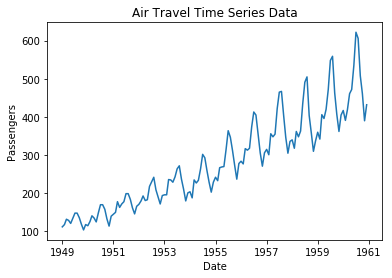

In [88]:
plt.plot(series)
plt.title('Air Travel Time Series Data')
plt.xlabel('Date')
plt.ylabel('Passengers')

Text(0,0.5,'Passengers, log diff 1 transform')

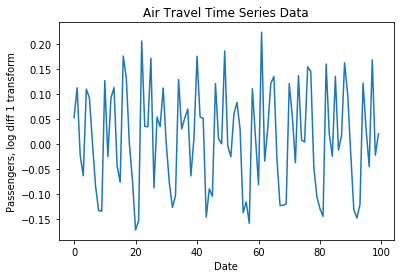

In [94]:
percent_training = 0.7
split_point = round(len(series) * percent_training)
training, testing = series[0:split_point], series[split_point:]
# log transformation
training = np.log(training)
# positive linear trend => apply differencing of 1 period
training_diff = training.diff(periods=1).values[1:]
# Residuals plot after log transform and differencing
plt.plot(training_diff)
plt.title('Air Travel Time Series Data')
plt.xlabel('Date')
plt.ylabel('Passengers, log diff 1 transform')

Text(0,0.5,'PACF')

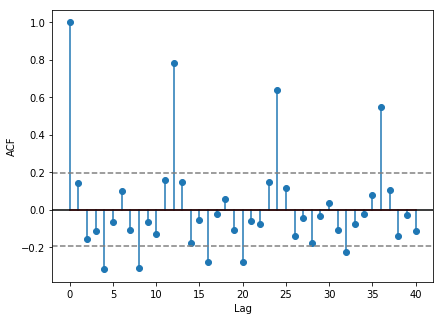

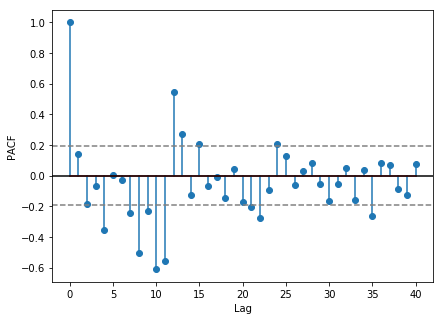

In [96]:
from statsmodels.tsa.stattools import acf, pacf
# ACF is just autocorrelation function;
# PACF is partial (i.e. accounts for values in between not just endpoints of lag)
lag_acf = acf(training_diff, nlags = 40)
lag_pacf = pacf(training_diff, nlags = 40, method='ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.figure(figsize=(15,5))
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')


"Looking at the ACF and PACF plots of the differenced series we see our first significant value at lag 4 for ACF and at the same lag 4 for the PACF which suggest to use p = 4 and q = 4. We also have a big value at lag 12 in the ACF plot which suggests our season is S = 12 and since this lag is positive it suggests P = 1 and Q = 0. Since this is a differenced series for SARIMA we set d = 1, and since the seasonal pattern is not stable over time we set D = 0. All together this gives us a SARIMA(4,1,4)(1,0,0)[12] model. Next we run SARIMA with these values to fit a model on our training data."

In [97]:
model = SARIMAX(training, order=(4,1,4), seasonal_order=(1,0,0,12),
                enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False) # extract the fitted model

/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### Forecast!

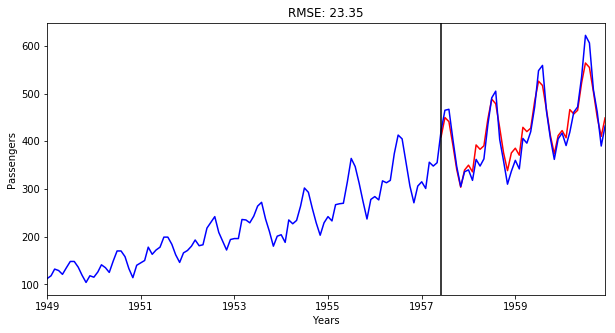

In [100]:
K = len(testing)
forecast = model_fit.forecast(K)
forecast = np.exp(forecast) # invert log transform

plt.figure(figsize=(10,5))
plt.plot(forecast,'r')
plt.plot(series,'b')
plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)))
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black')

"We can see here that the multi-step forecast of our SARIMA(4,1,4)(1,0,0)[12] model fits the testing data extremely well with an RMSE of 23.7! When you manually conduct a good time series analysis, as I have done here, it will be difficult to beat ARMA models for forecasting. I also ran grid search and found the best model to be SARIMA(1, 0, 1)x(1, 1, 1)[12] which had an AIC of 696.05. This resulted in a forecast with an RMSE of 24.74, which is also pretty good! In conclusion depending on your forecasting problem, SARIMA is always a great choice to choose."

Would be cool to run a grid search to minimize AIC, but that's pretty cool material for now.

And here is a [nice example](https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials) in R. This is even more detailed and pretty cool!  Worth revisiting at some point.